### Distribution Plots, Joint Plots, PairPlots, Rugplots, kdeplots

In [1]:
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
tips = sns.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


C:\Users\Vikrant Yadav\AppData\Local\Temp\ipykernel_33056\4271412032.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips['total_bill'])


<Axes: xlabel='total_bill', ylabel='Density'>

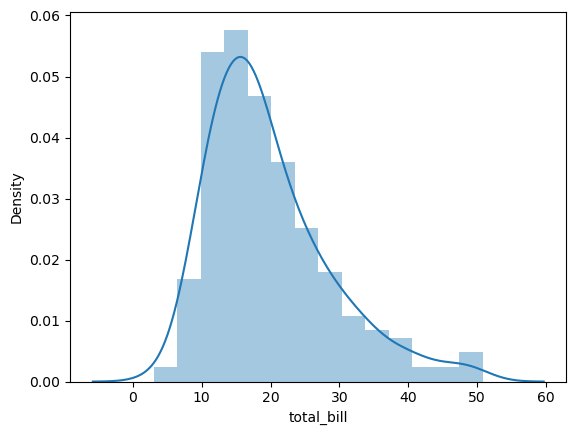

In [5]:
sns.distplot(tips['total_bill'])

C:\Users\Vikrant Yadav\AppData\Local\Temp\ipykernel_33056\1880815449.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips['total_bill'], kde = False)


<Axes: xlabel='total_bill'>

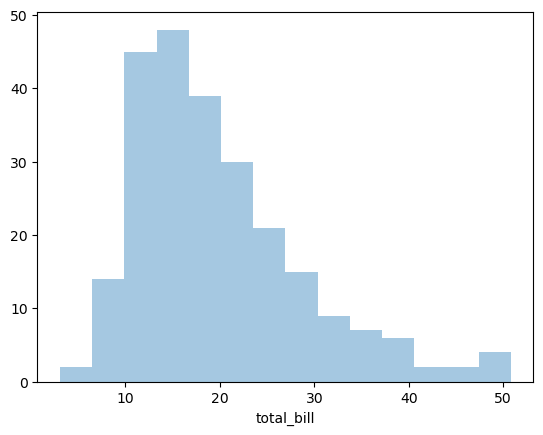

In [6]:
sns.distplot(tips['total_bill'], kde = False)

C:\Users\Vikrant Yadav\AppData\Local\Temp\ipykernel_33056\292642782.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips['total_bill'], kde = False, bins=30)


<Axes: xlabel='total_bill'>

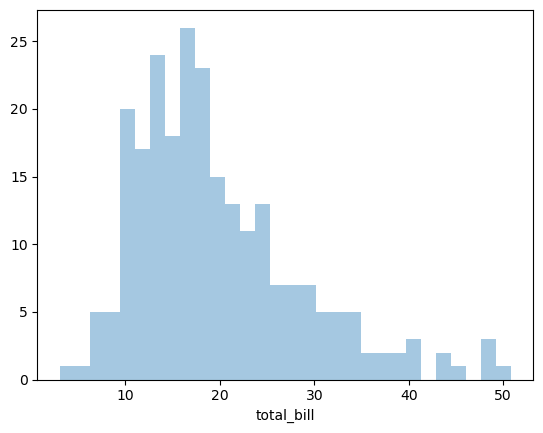

In [7]:
sns.distplot(tips['total_bill'], kde = False, bins=30)

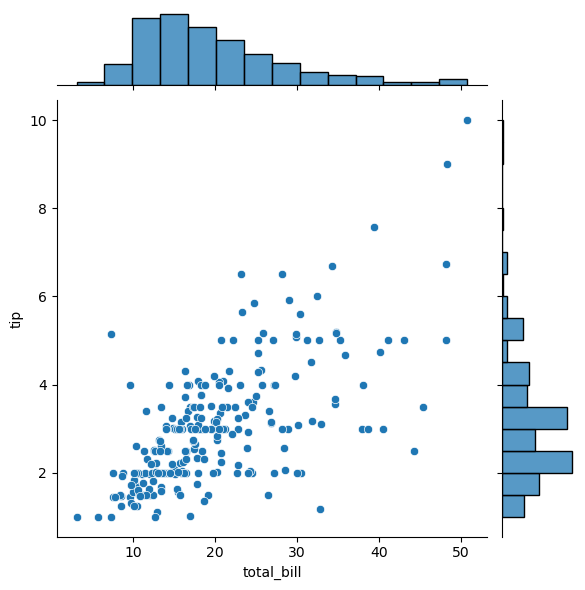

In [8]:
sns.jointplot(x='total_bill',y='tip',data=tips)

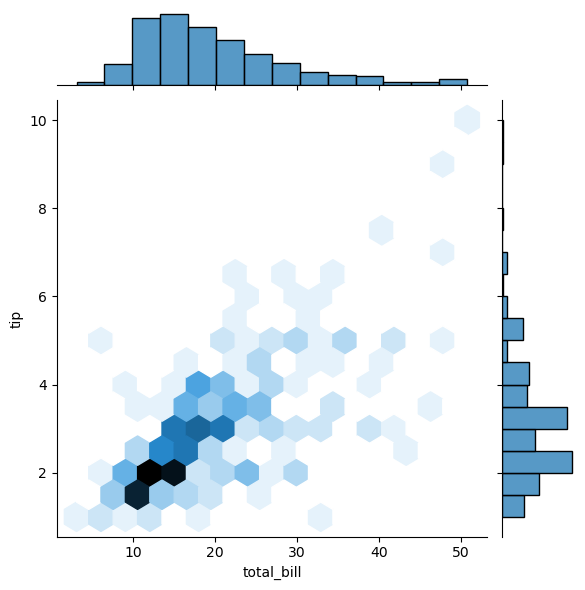

In [9]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind='hex')

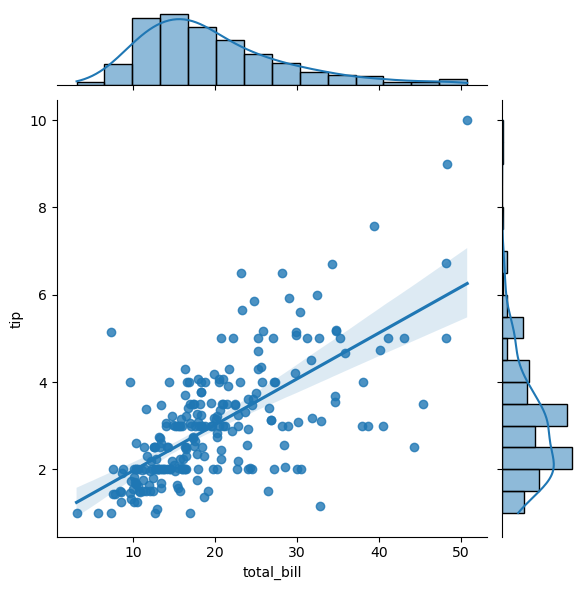

In [10]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind='reg')

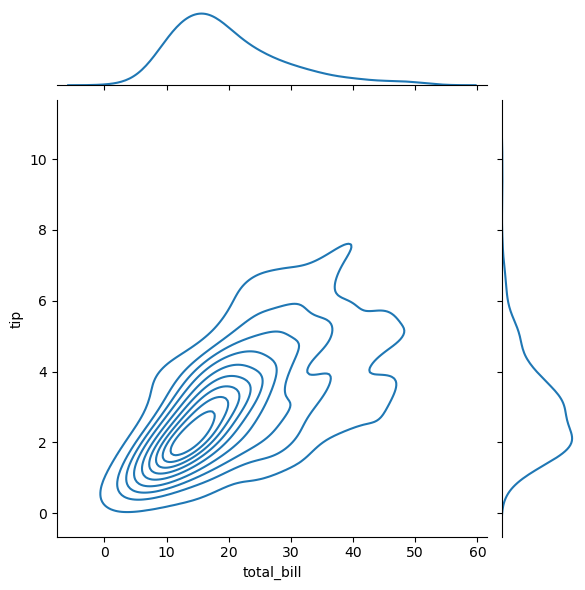

In [11]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind='kde')

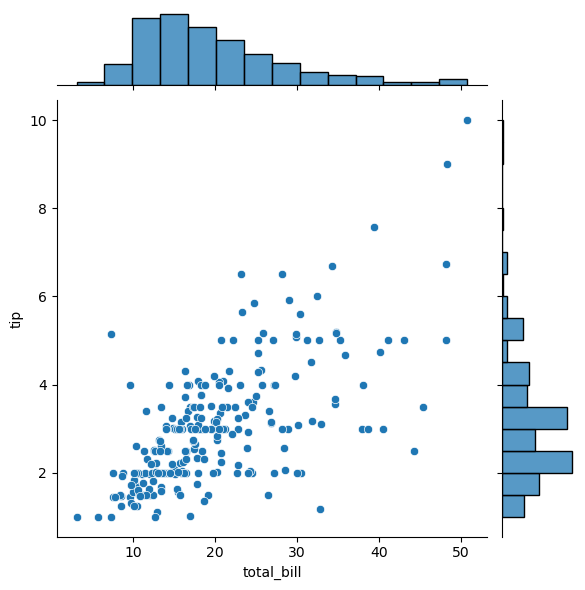

In [12]:
sns.jointplot(x='total_bill',y='tip',data=tips) #by default kind is scatter.

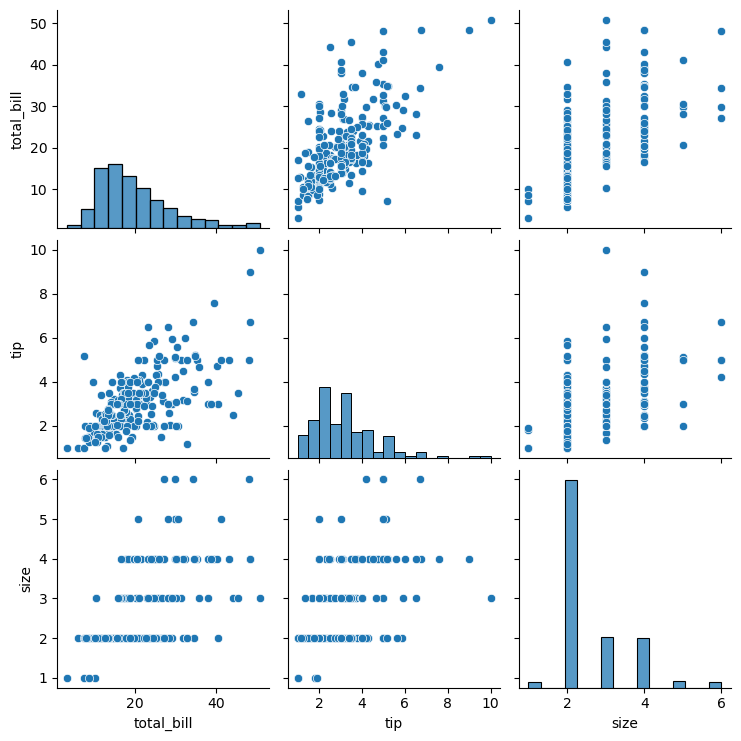

In [13]:
sns.pairplot(tips) #it makes plot for comparison between all numerical values.

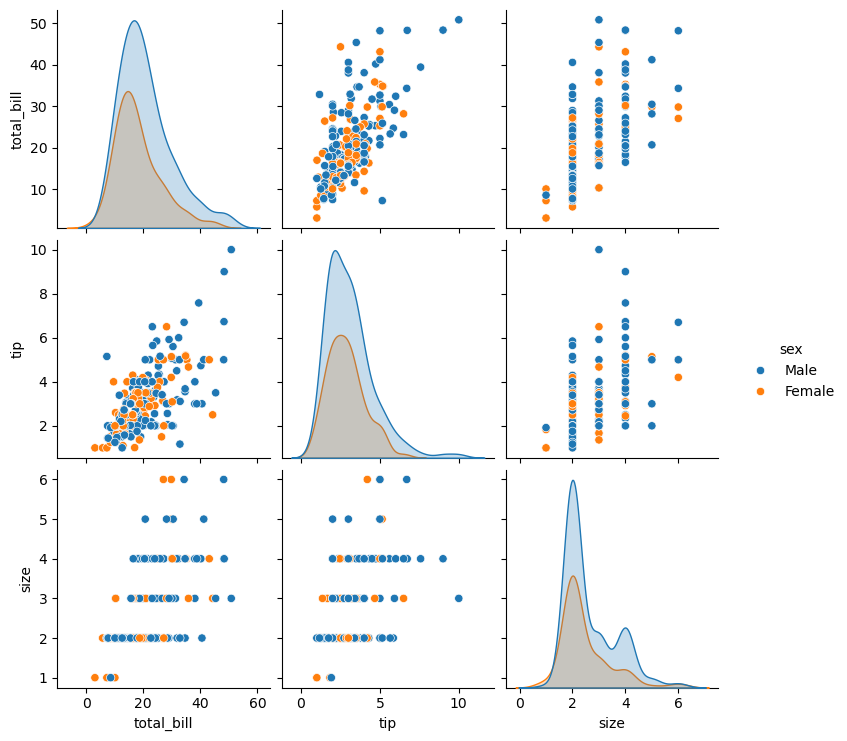

In [14]:
sns.pairplot(tips,hue='sex') #hue is used for categorical variables, it colours them.

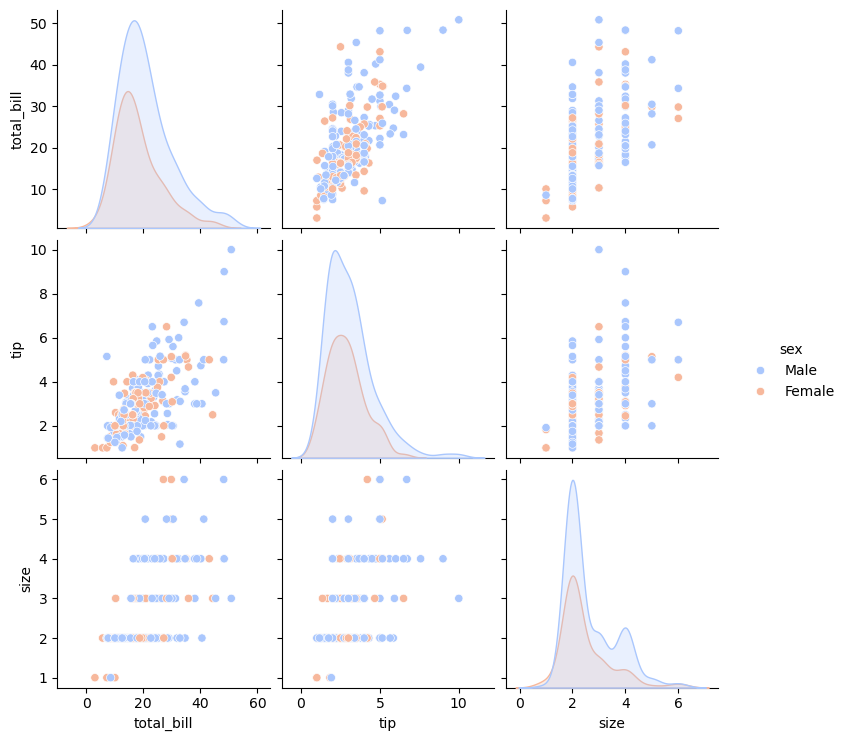

In [15]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

<Axes: xlabel='total_bill'>

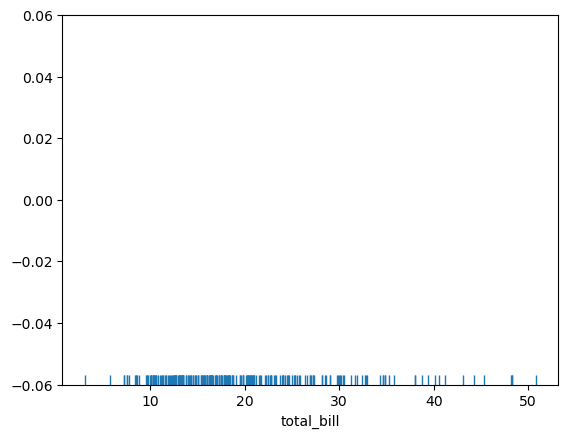

In [16]:
sns.rugplot(tips['total_bill'])

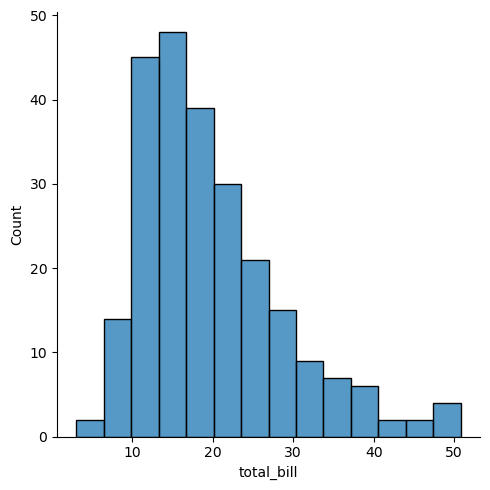

In [17]:
sns.displot(tips['total_bill'],kde=False)

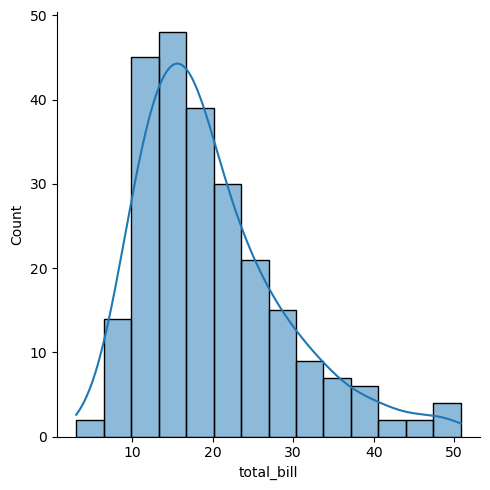

In [38]:
sns.displot(tips['total_bill'],kde=True)

(0.0, 1.0)

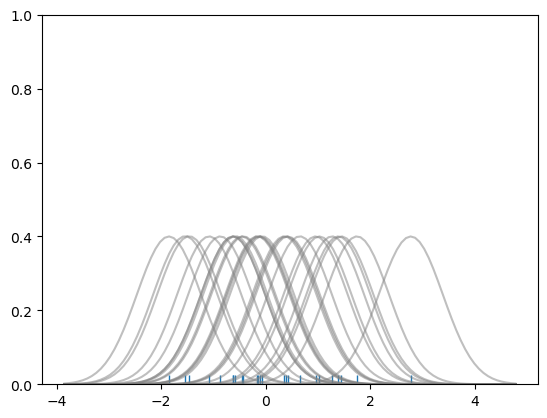

In [40]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

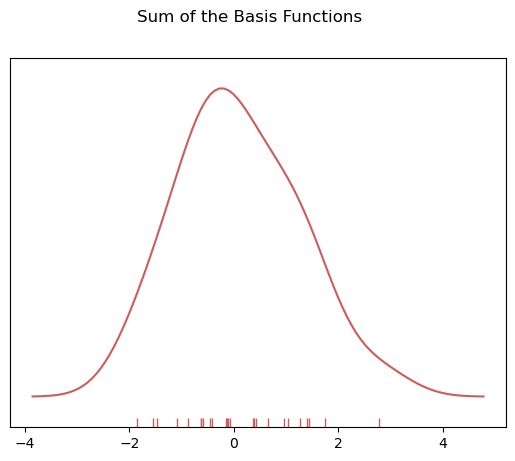

In [42]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

<Axes: xlabel='total_bill', ylabel='Density'>

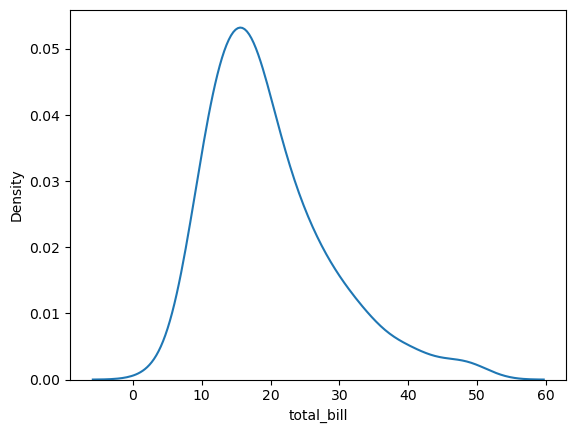

In [44]:
sns.kdeplot(tips['total_bill'])

### Categorical Plots

In [48]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='sex', ylabel='total_bill'>

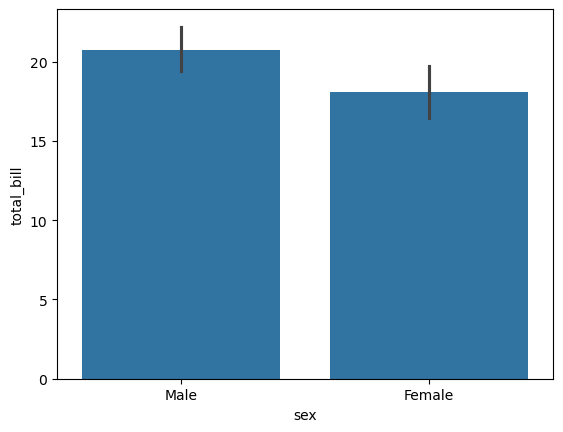

In [50]:
sns.barplot(x='sex',y='total_bill',data=tips) #by default it is showing mean of total_bill per sex.

<Axes: xlabel='sex', ylabel='total_bill'>

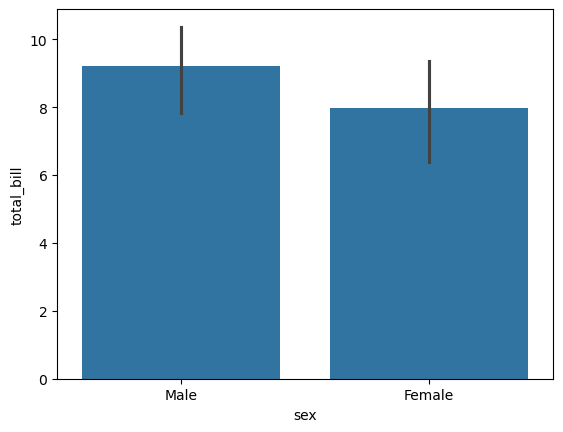

In [54]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std) #we can add any aggregate function of our choice as well in estimator.

<Axes: xlabel='sex', ylabel='count'>

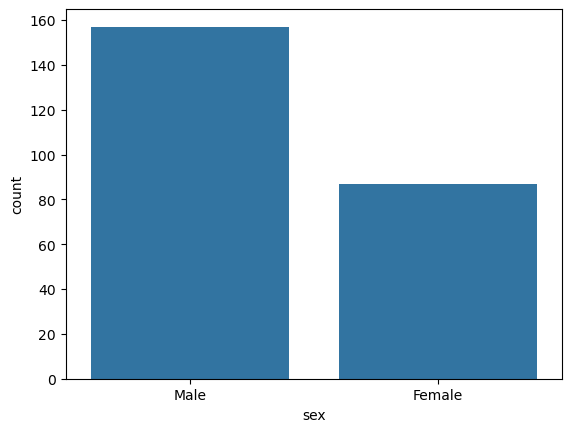

In [58]:
sns.countplot(x='sex',data=tips)  #explicitly counts the number.

<Axes: xlabel='day', ylabel='total_bill'>

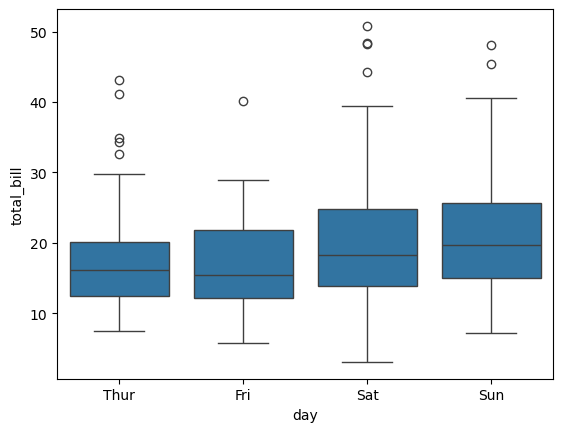

In [60]:
sns.boxplot(x='day',y='total_bill', data=tips)

<Axes: xlabel='day', ylabel='total_bill'>

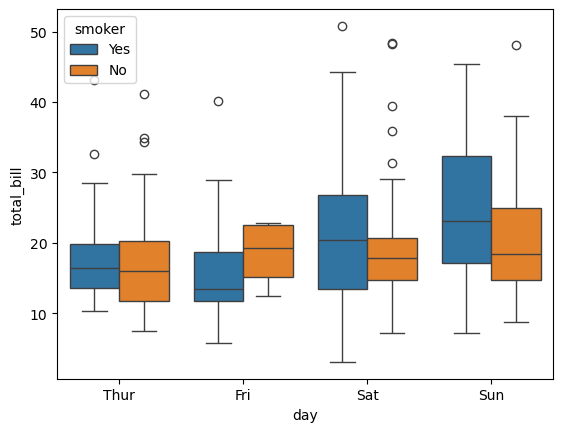

In [62]:
sns.boxplot(x='day',y='total_bill', data=tips,hue='smoker')

<Axes: xlabel='day', ylabel='total_bill'>

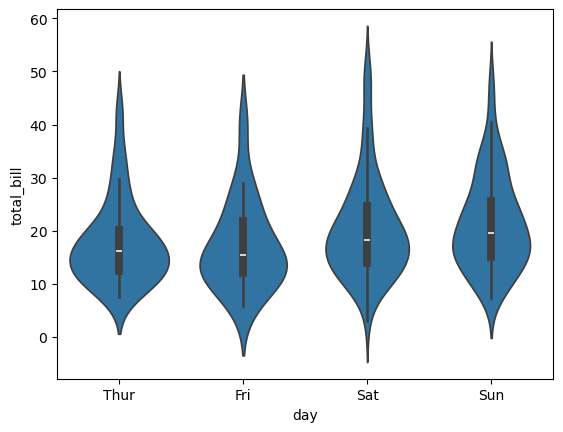

In [64]:
sns.violinplot(x='day',y='total_bill', data=tips)

<Axes: xlabel='day', ylabel='total_bill'>

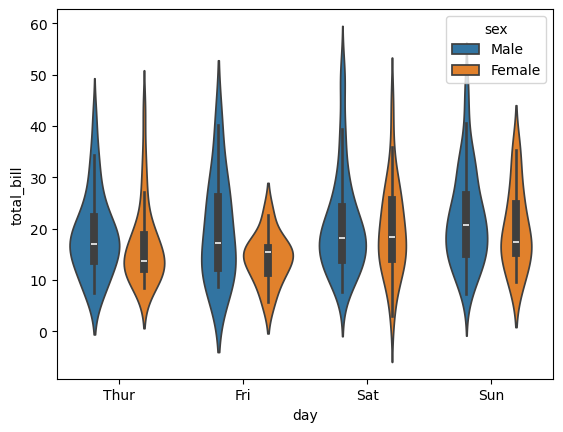

In [66]:
sns.violinplot(x='day',y='total_bill', data=tips,hue='sex')

<Axes: xlabel='day', ylabel='total_bill'>

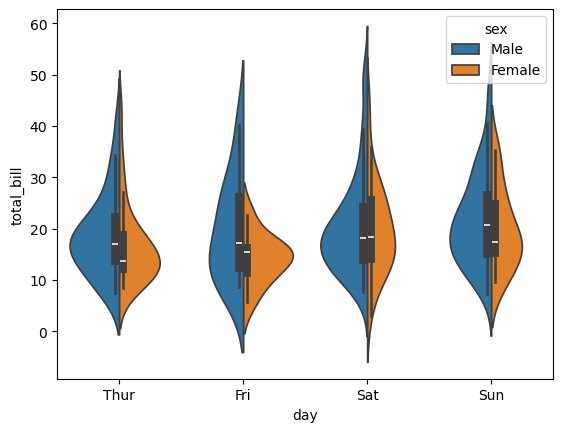

In [68]:
sns.violinplot(x='day',y='total_bill', data=tips,hue='sex',split=True)

<Axes: xlabel='day', ylabel='total_bill'>

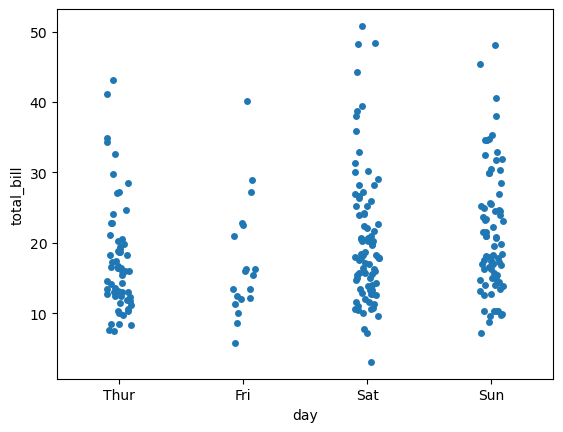

In [70]:
sns.stripplot(x='day',y='total_bill',data=tips)

<Axes: xlabel='day', ylabel='total_bill'>

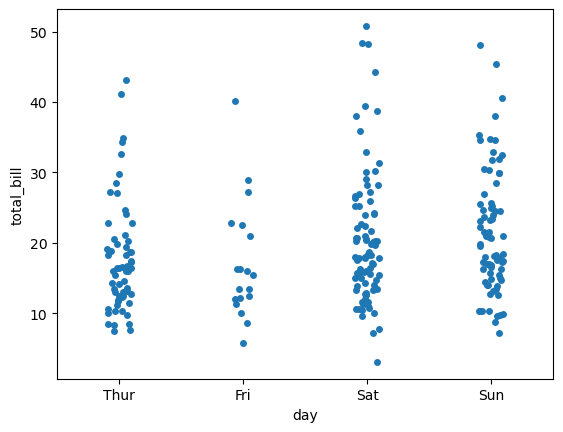

In [72]:
sns.stripplot(x='day',y='total_bill',data=tips,jitter = True)

<Axes: xlabel='day', ylabel='total_bill'>

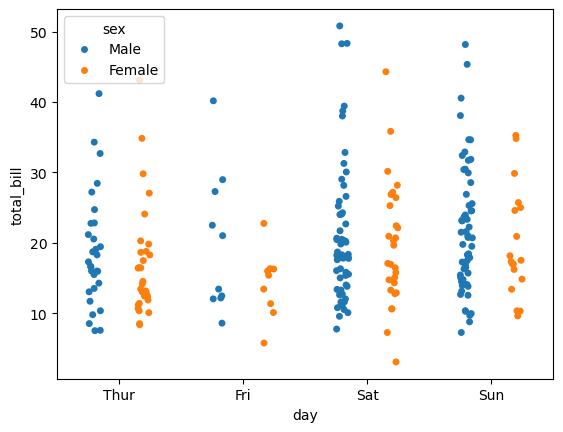

In [78]:
sns.stripplot(x='day',y='total_bill',data=tips,jitter = True, hue='sex', dodge= True)

<Axes: xlabel='day', ylabel='total_bill'>

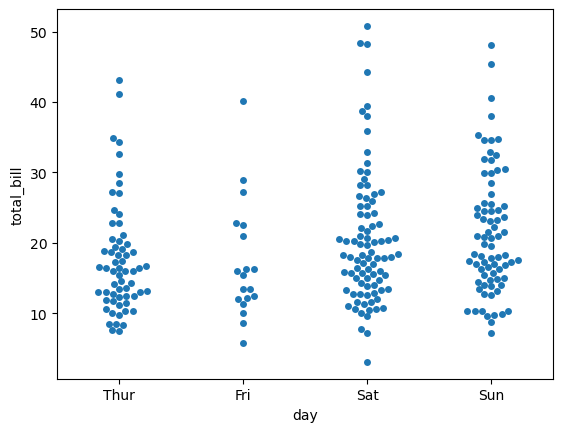

In [84]:
sns.swarmplot(x='day',y='total_bill', data= tips) #combination of strip and violin plots. Not useful for large datasets.

<Axes: xlabel='day', ylabel='total_bill'>

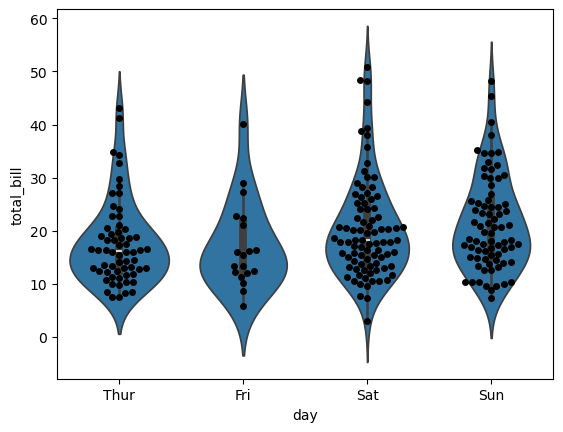

In [86]:
sns.violinplot(x='day',y='total_bill', data= tips)
sns.swarmplot(x='day',y='total_bill', data= tips,color='black')

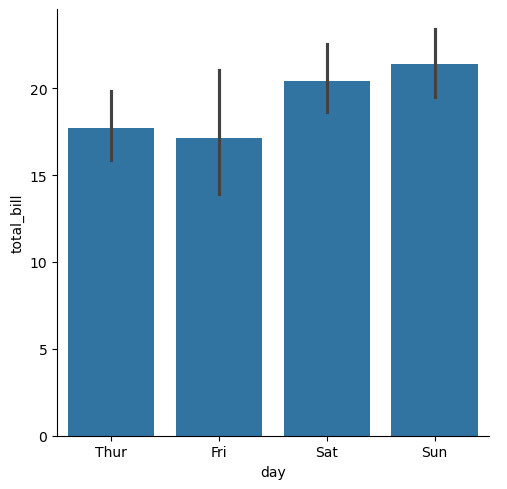

In [90]:
sns.catplot(x='day',y='total_bill', data= tips, kind='bar')

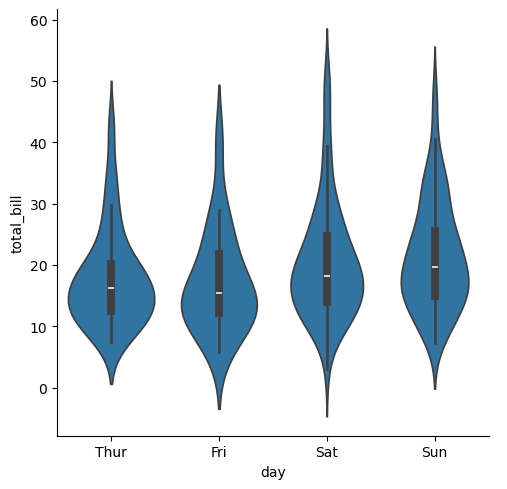

In [92]:
sns.catplot(x='day',y='total_bill', data= tips, kind='violin')

### Matrix Plots

In [95]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [97]:
flights = sns.load_dataset('flights')

In [99]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [111]:
t_c=tips.corr(numeric_only=True)
t_c

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<Axes: >

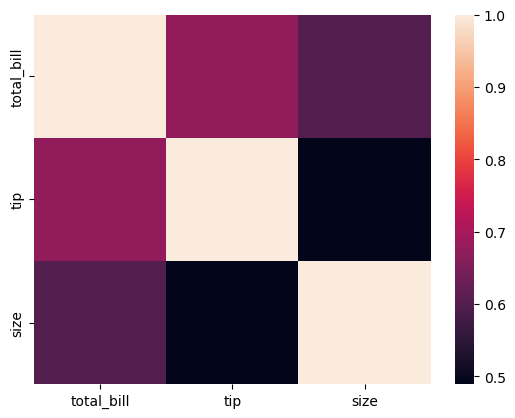

In [113]:
sns.heatmap(t_c)

<Axes: >

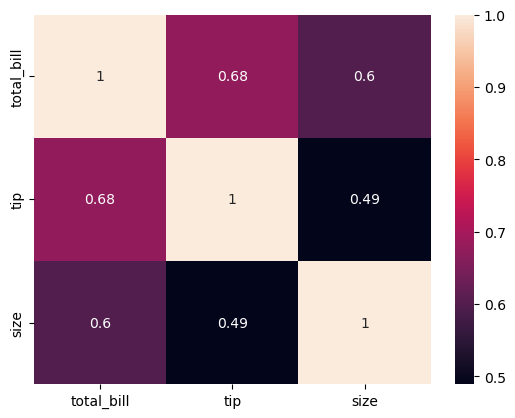

In [115]:
sns.heatmap(t_c,annot =True)

<Axes: >

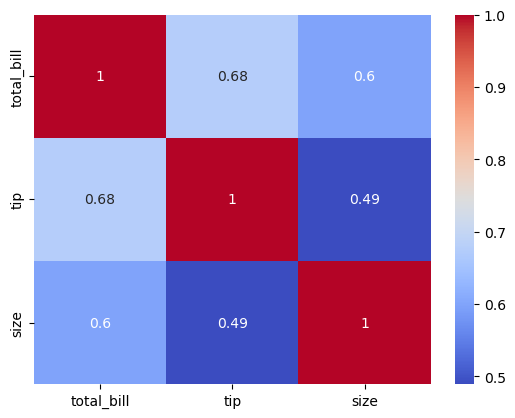

In [117]:
sns.heatmap(t_c,annot =True,cmap='coolwarm')

In [119]:
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [123]:
fp=flights.pivot_table(index='month',columns='year',values='passengers')

C:\Users\Vikrant Yadav\AppData\Local\Temp\ipykernel_33056\2534965686.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  fp=flights.pivot_table(index='month',columns='year',values='passengers')


In [125]:
fp

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0
Jun,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
Jul,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
Aug,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
Sep,136.0,158.0,184.0,209.0,237.0,259.0,312.0,355.0,404.0,404.0,463.0,508.0


<Axes: xlabel='year', ylabel='month'>

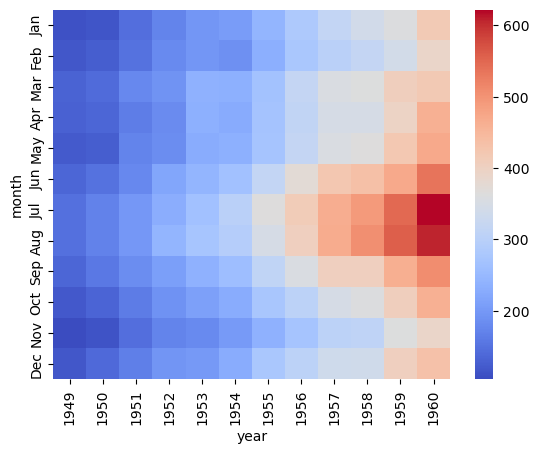

In [129]:
sns.heatmap(fp,cmap='coolwarm')

<Axes: xlabel='year', ylabel='month'>

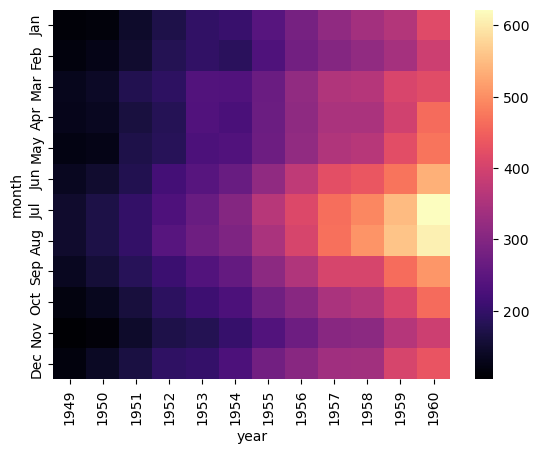

In [131]:
sns.heatmap(fp,cmap='magma')

<Axes: xlabel='year', ylabel='month'>

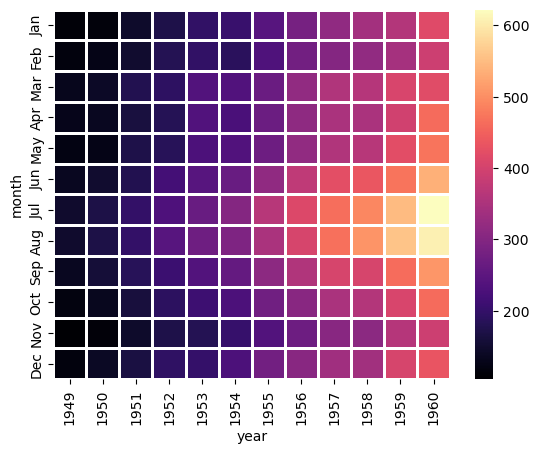

In [133]:
sns.heatmap(fp,cmap='magma',linecolor='white',linewidth=1)

<Axes: xlabel='year', ylabel='month'>

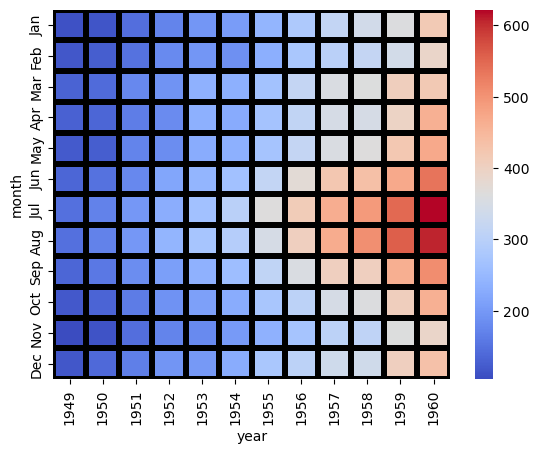

In [135]:
sns.heatmap(fp,cmap='coolwarm',linecolor='black',linewidth=3)

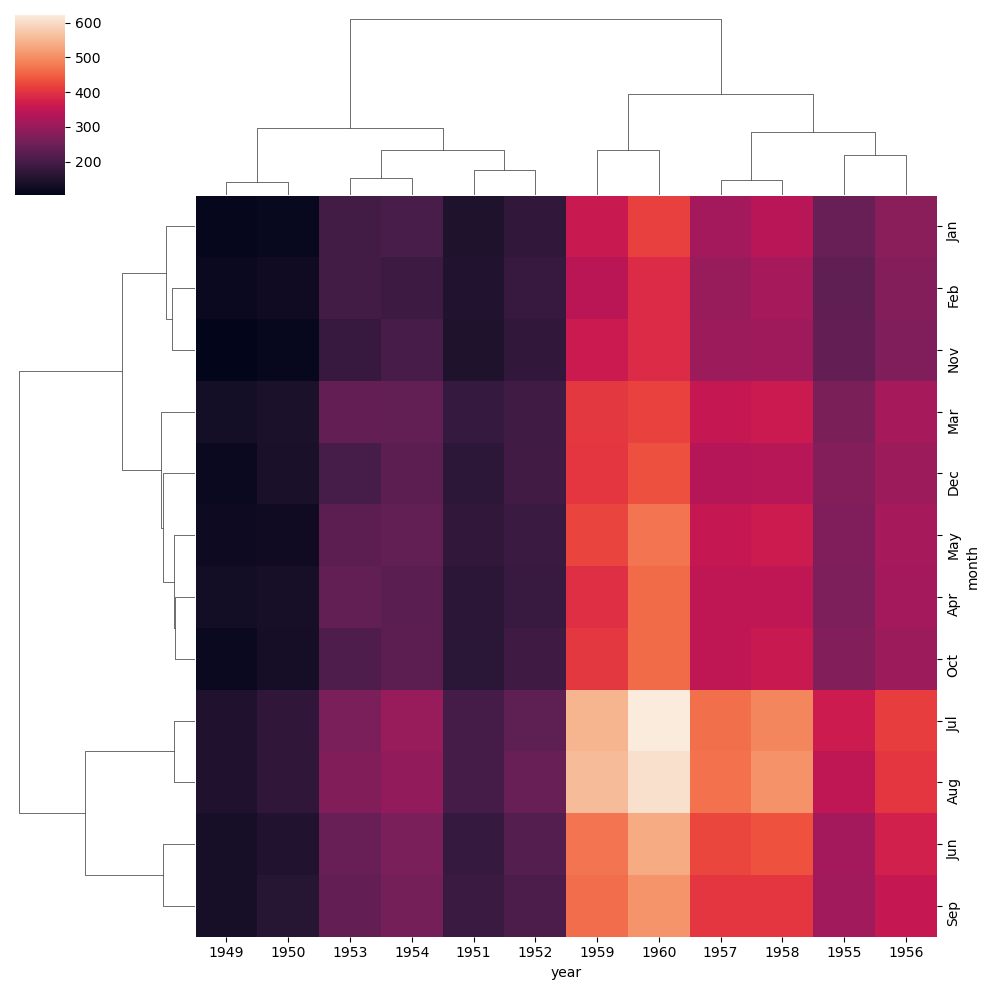

In [137]:
sns.clustermap(fp)

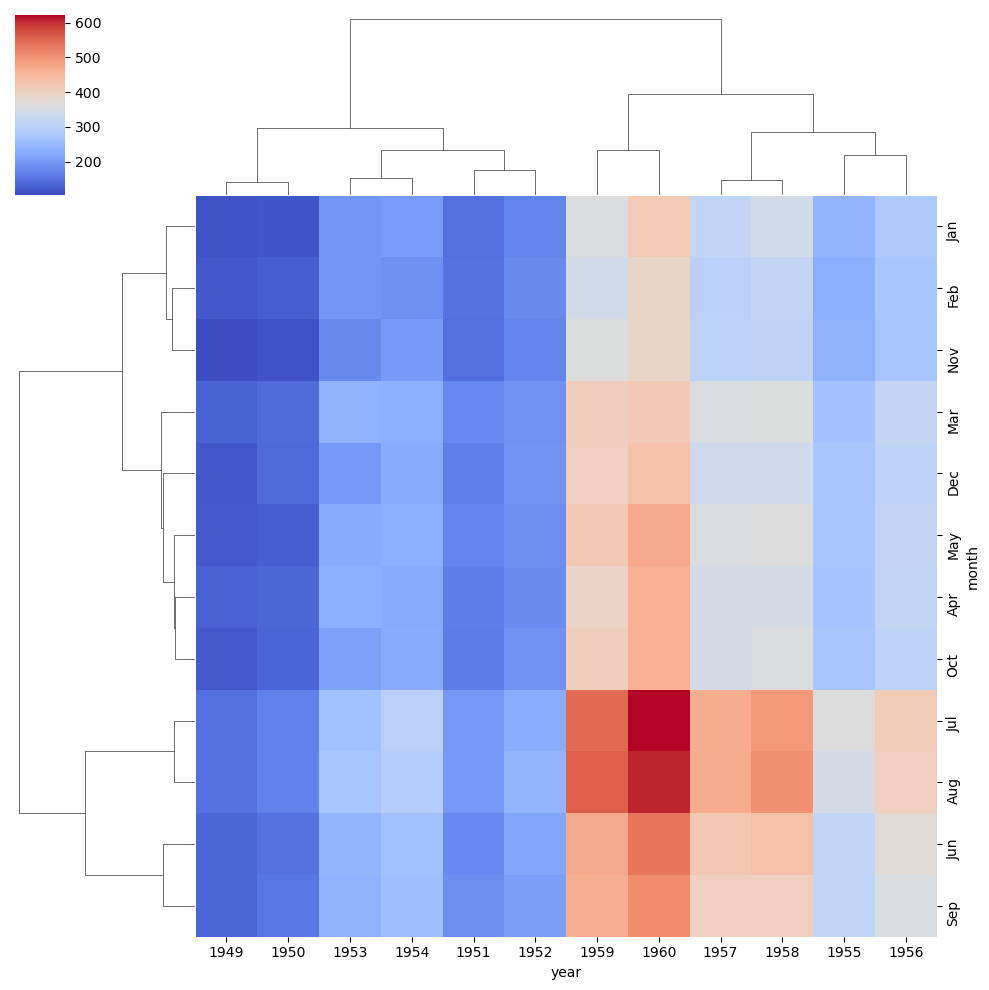

In [139]:
sns.clustermap(fp,cmap='coolwarm')

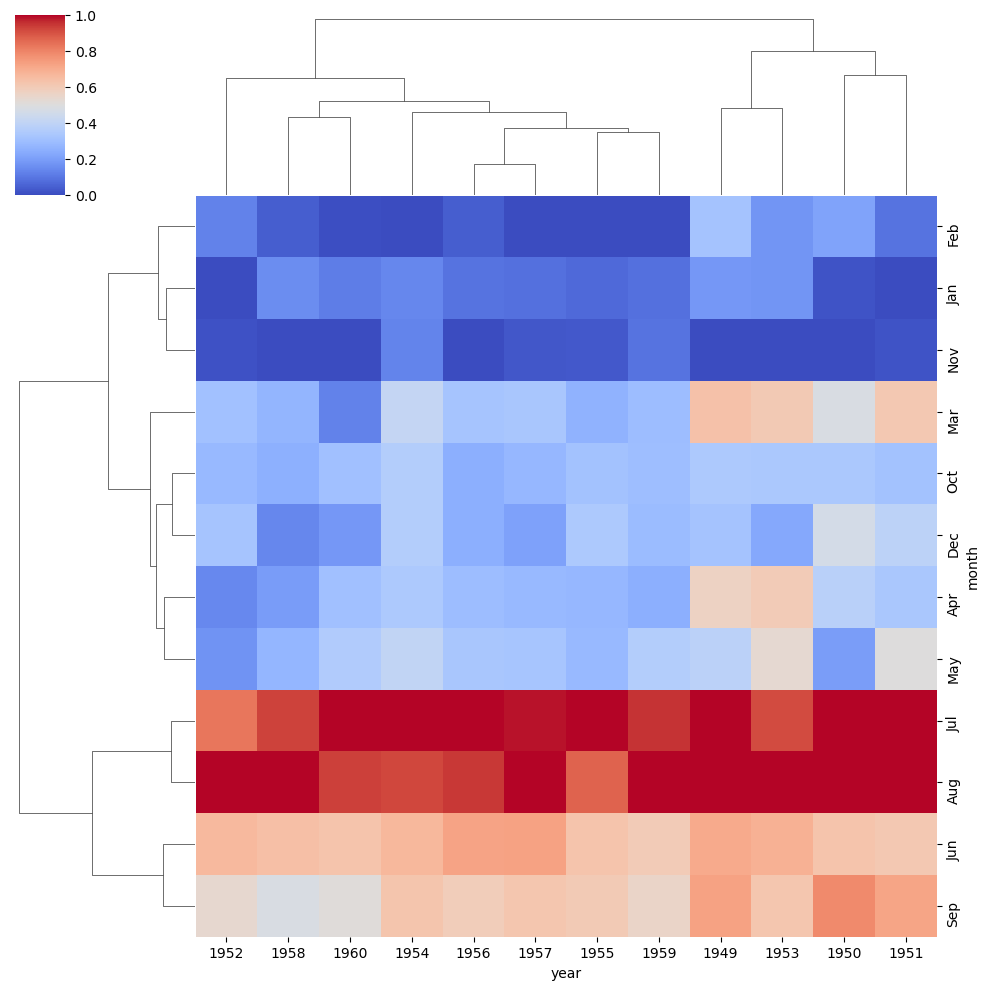

In [141]:
sns.clustermap(fp,cmap='coolwarm',standard_scale=1)

### Grids

In [144]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


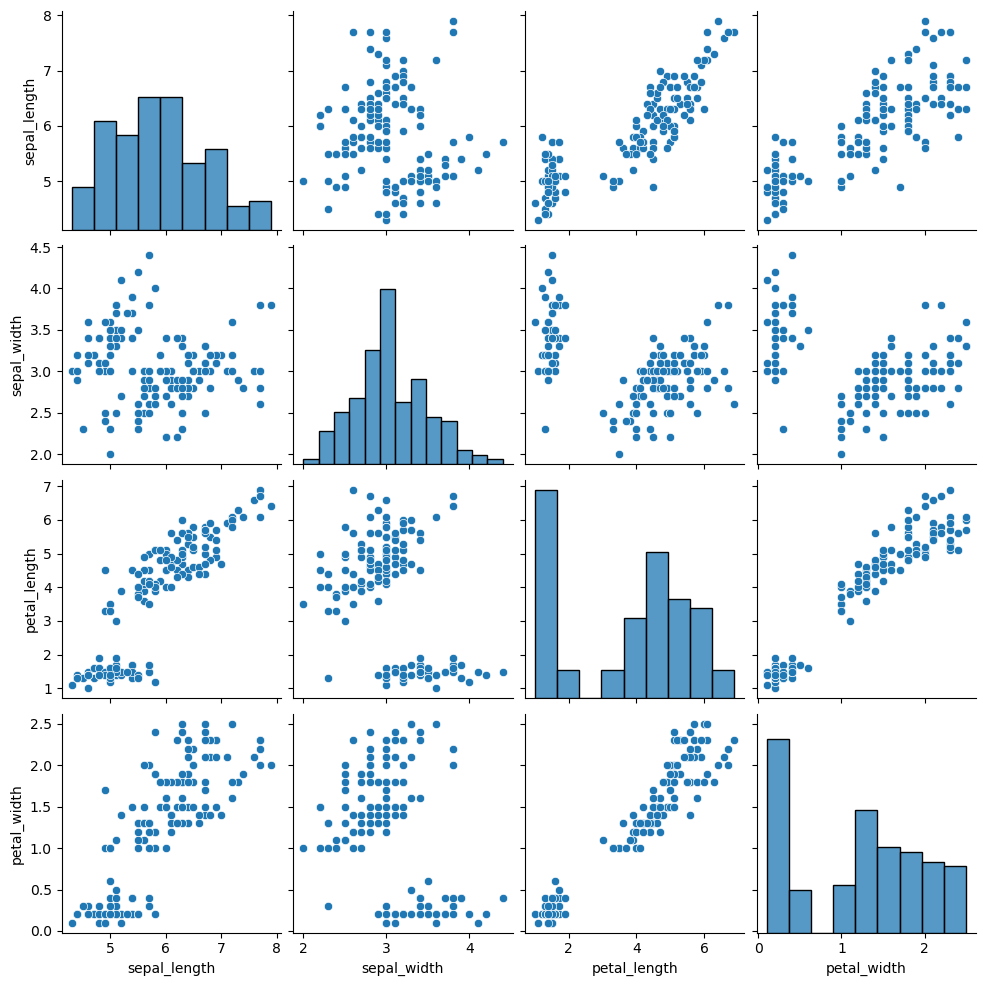

In [146]:
sns.pairplot(iris)

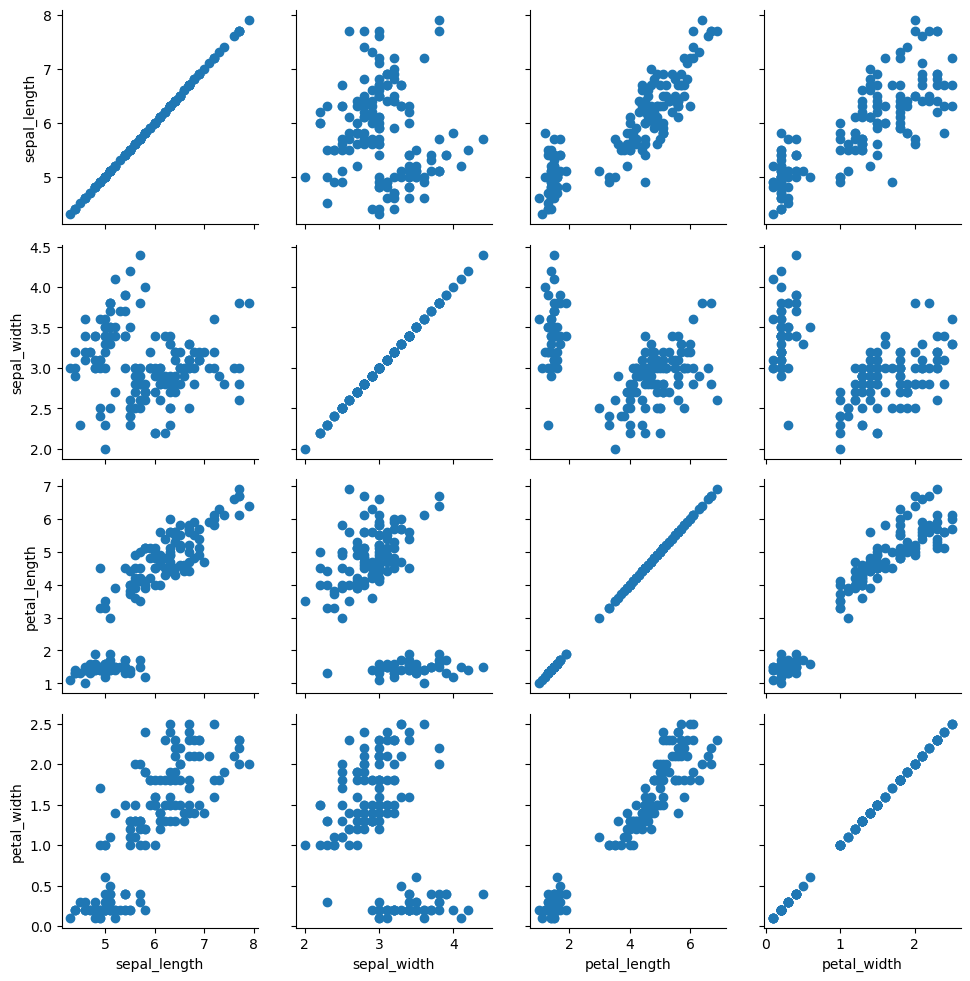

In [154]:
g = sns.PairGrid(iris)
g.map(plt.scatter)

C:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:1550: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=color, **plot_kwargs)
C:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:1550: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=color, **plot_kwargs)
C:

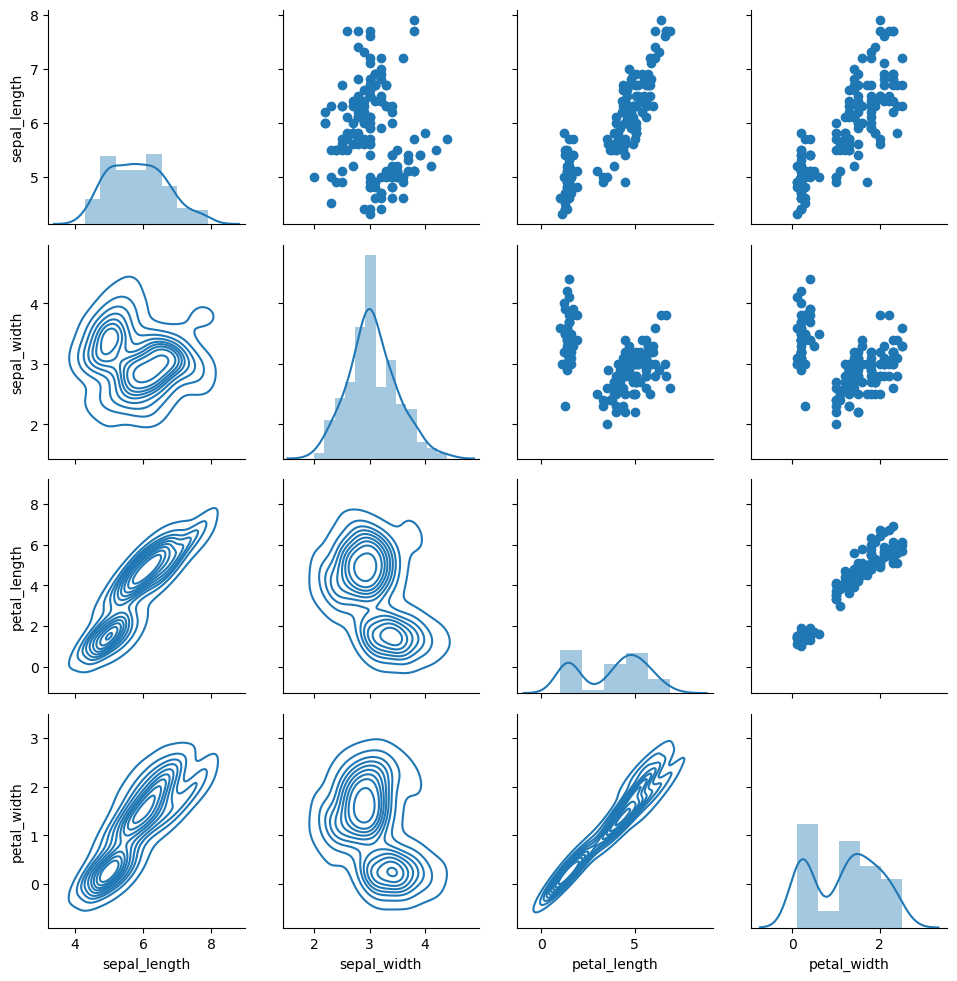

In [160]:
g = sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

In [162]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


C:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:854: U

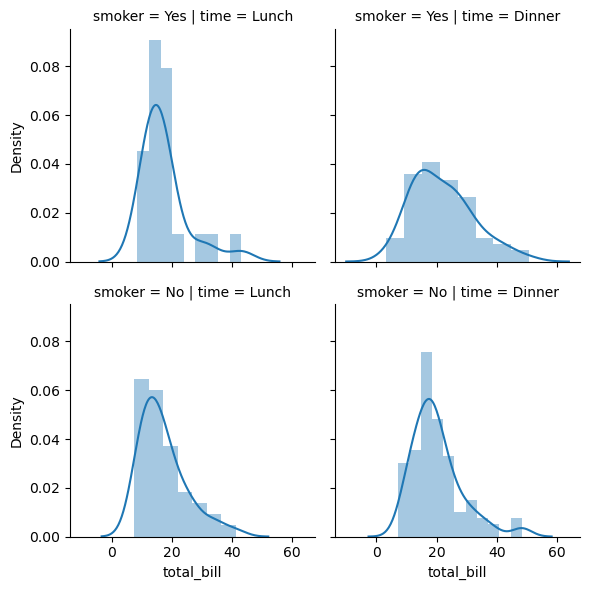

In [170]:
g = sns.FacetGrid(data=tips,col='time',row='smoker')
g.map(sns.distplot,'total_bill')

TypeError: scatter() missing 1 required positional argument: 'y'

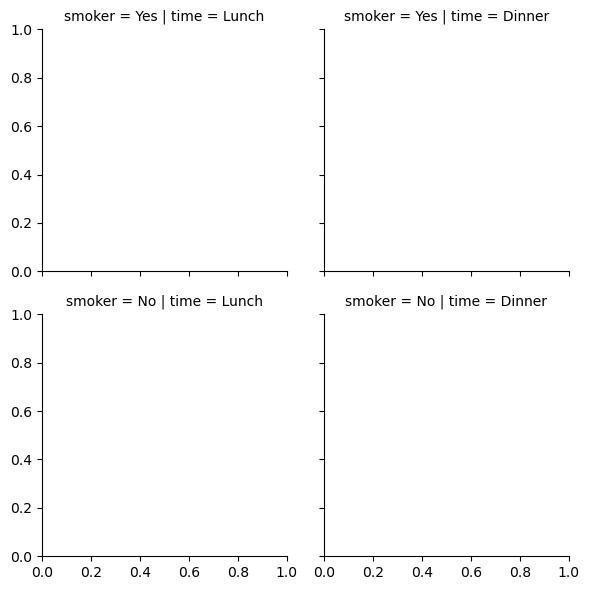

In [172]:
g = sns.FacetGrid(data=tips,col='time',row='smoker')
g.map(plt.scatter,'total_bill')

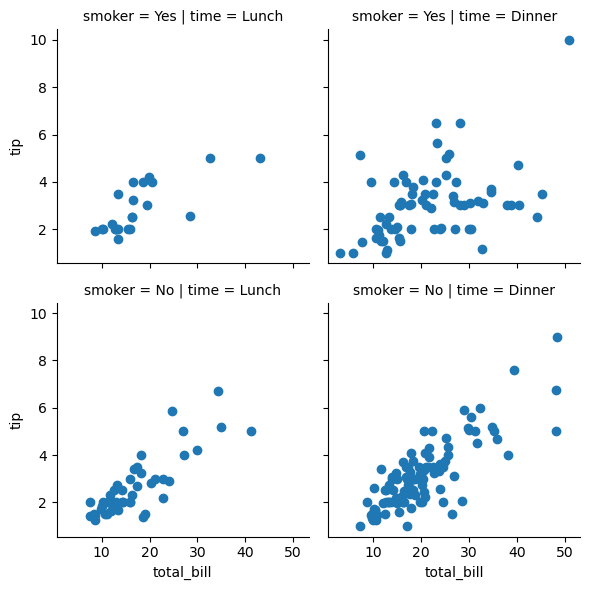

In [174]:
g = sns.FacetGrid(data=tips,col='time',row='smoker')
g.map(plt.scatter,'total_bill','tip')

### Regression Plots

In [177]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


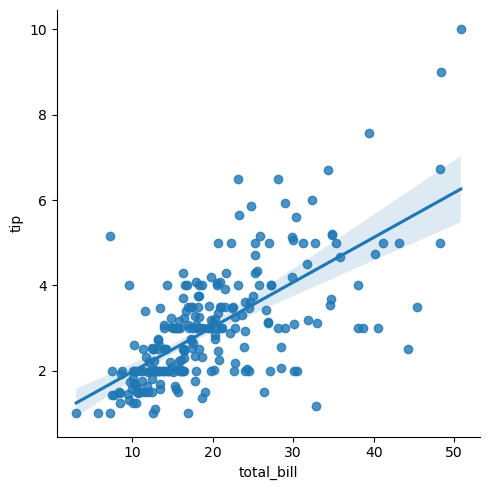

In [179]:
sns.lmplot(x='total_bill',y='tip',data=tips)

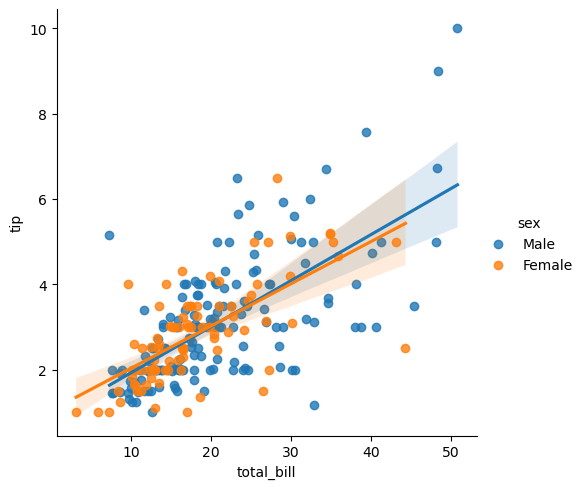

In [181]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex')

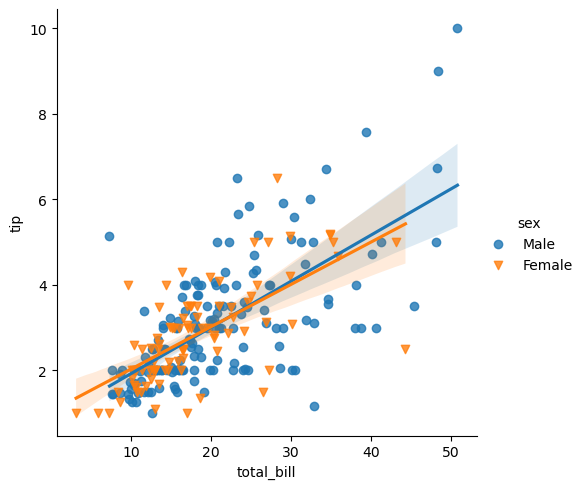

In [183]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',markers=['o','v'])

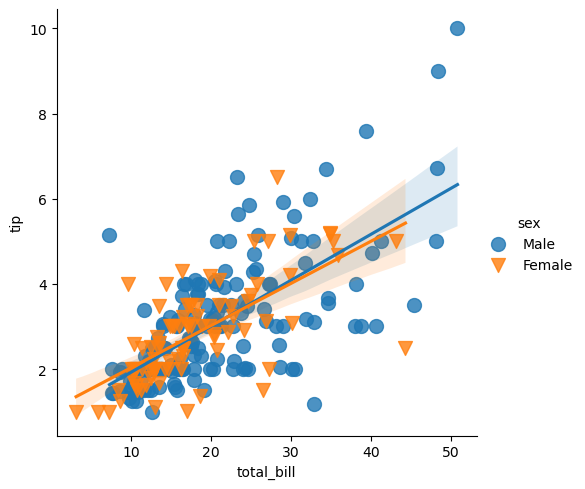

In [185]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',markers=['o','v'],scatter_kws={'s':100})

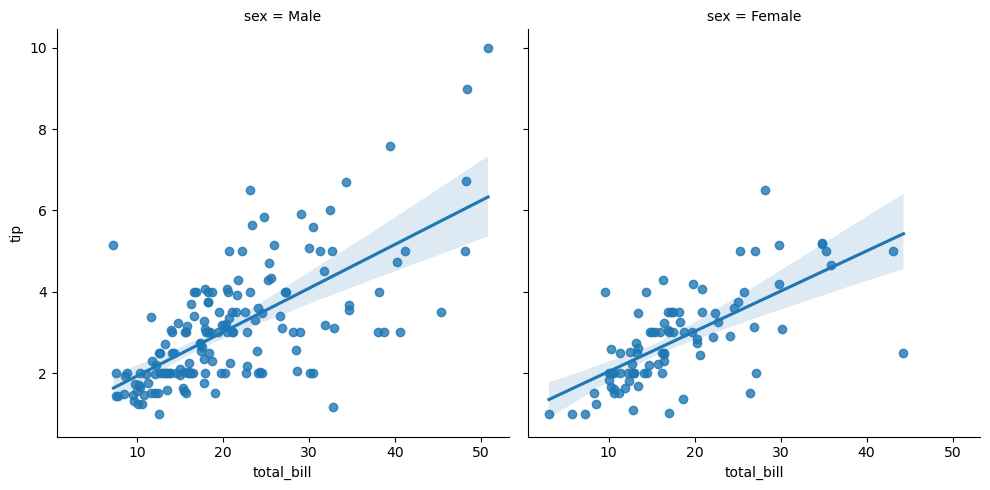

In [187]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex')

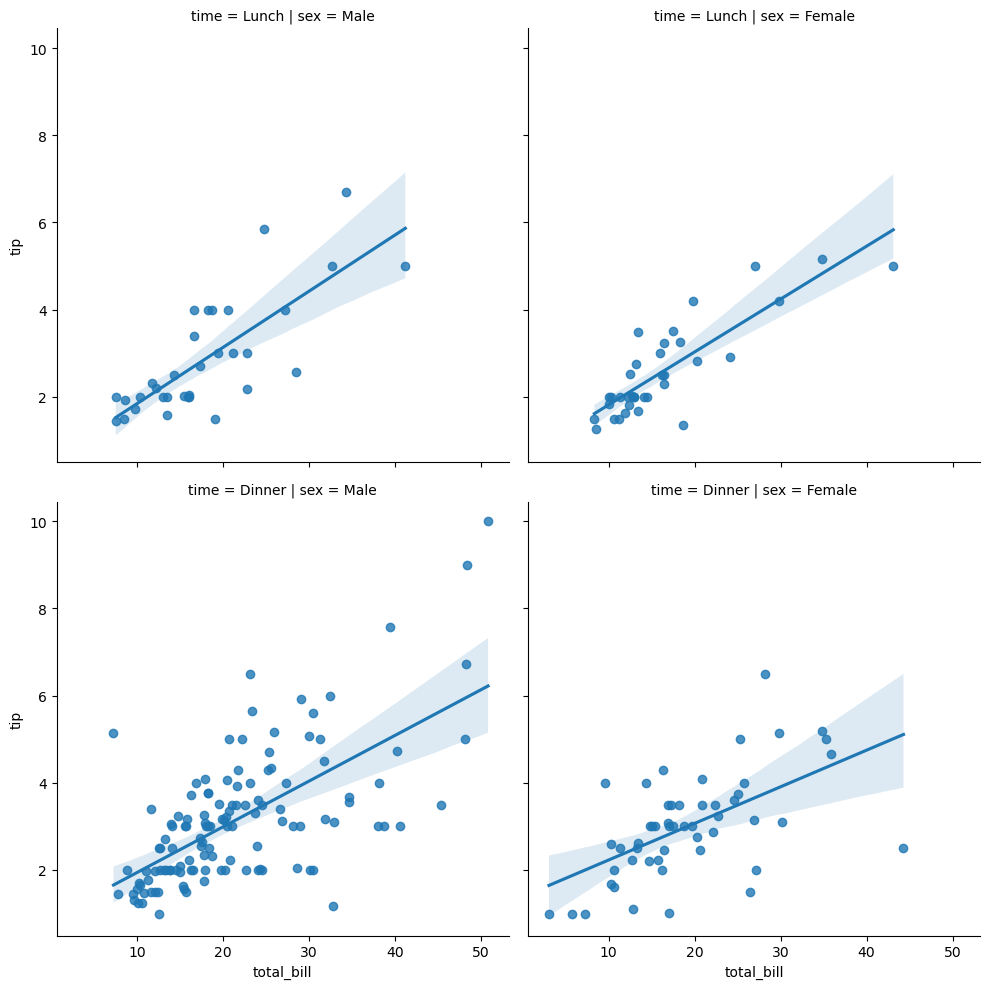

In [189]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex',row='time')

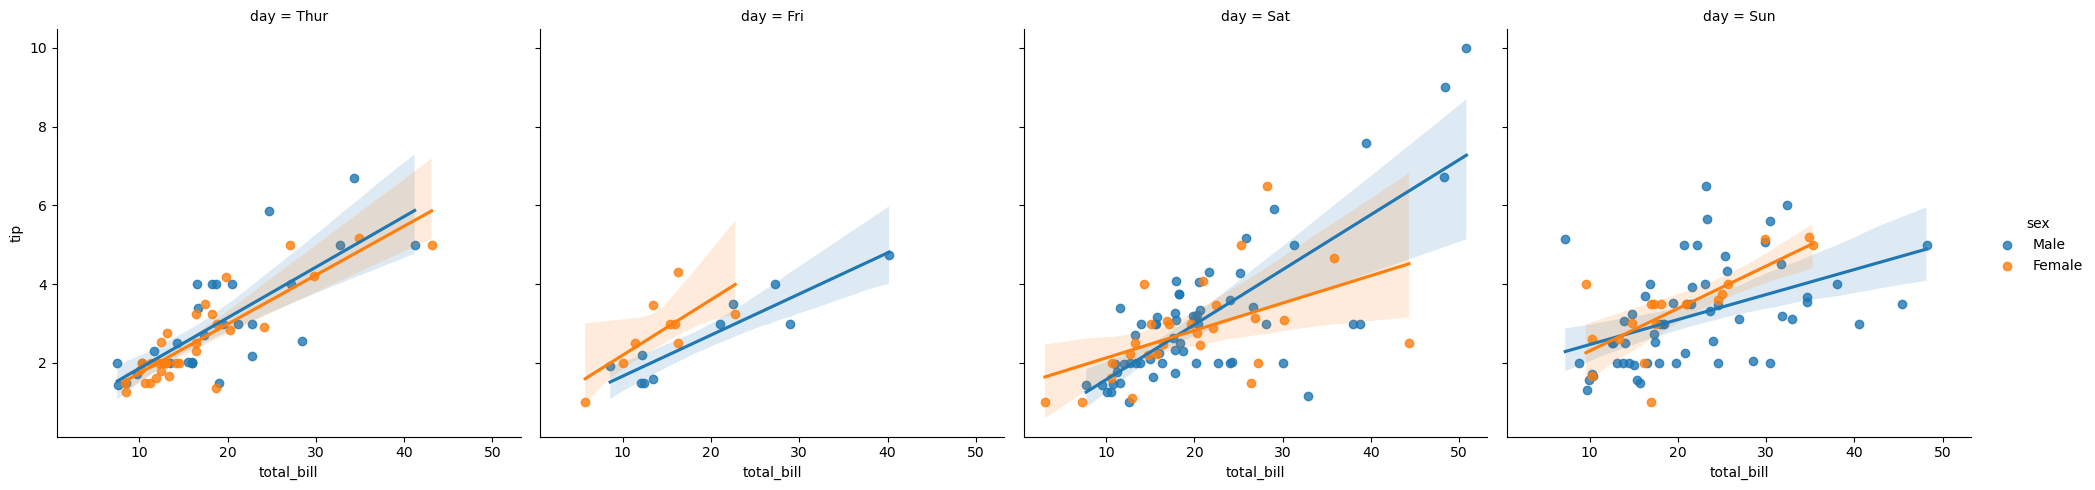

In [193]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex')

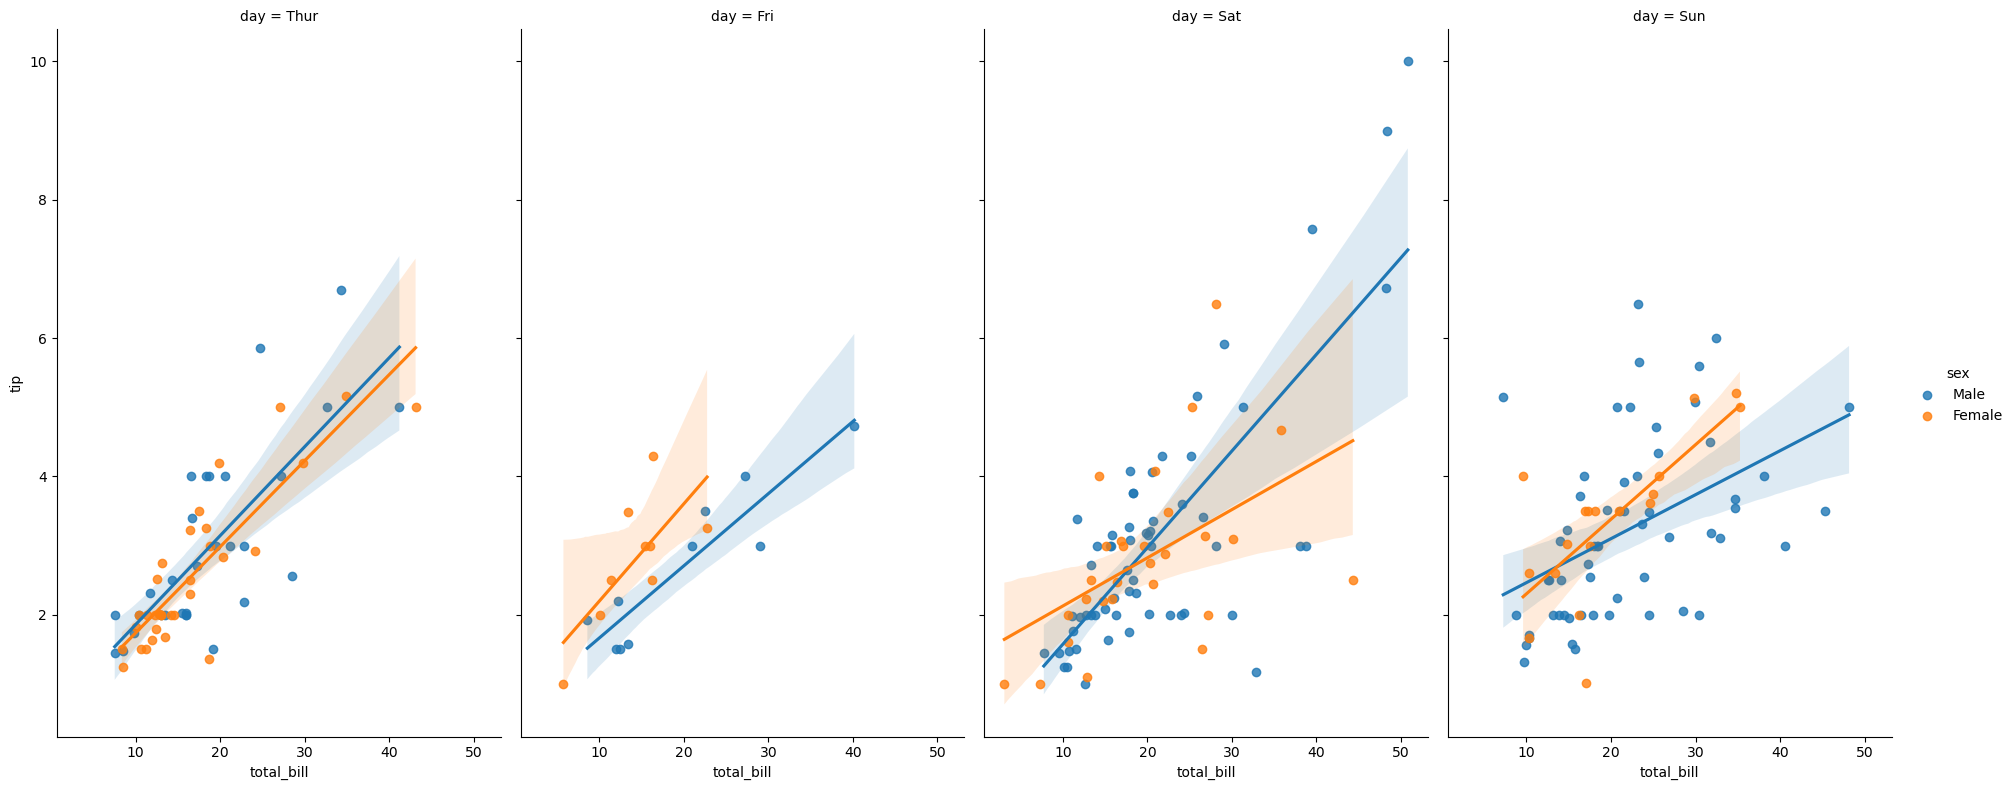

In [197]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',aspect=0.6,height=8)

### Style and Color

In [200]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='sex', ylabel='count'>

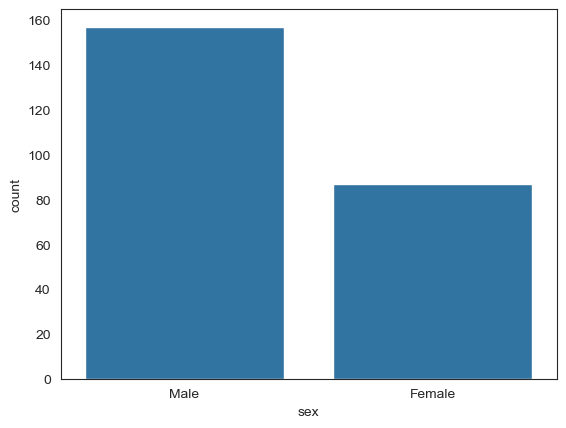

In [208]:
sns.set_style('white')
sns.countplot(x='sex',data=tips)

<Axes: xlabel='sex', ylabel='count'>

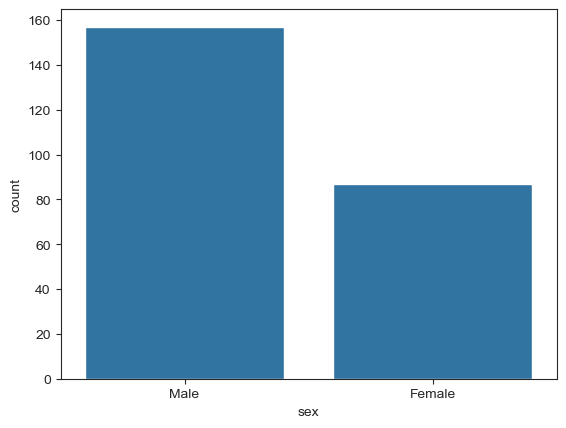

In [210]:
sns.set_style('ticks')
sns.countplot(x='sex',data=tips)

<Axes: xlabel='sex', ylabel='count'>

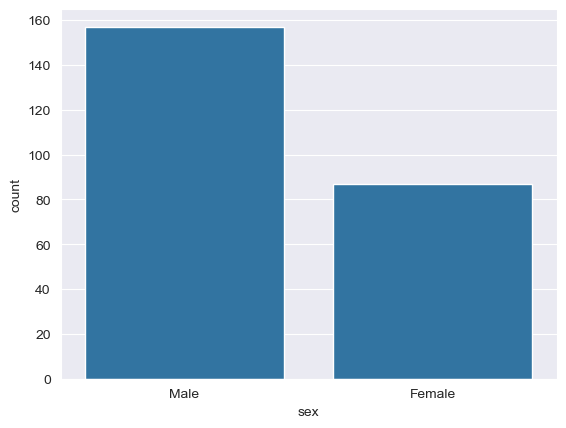

In [212]:
sns.set_style('darkgrid')
sns.countplot(x='sex',data=tips)

<Axes: xlabel='sex', ylabel='count'>

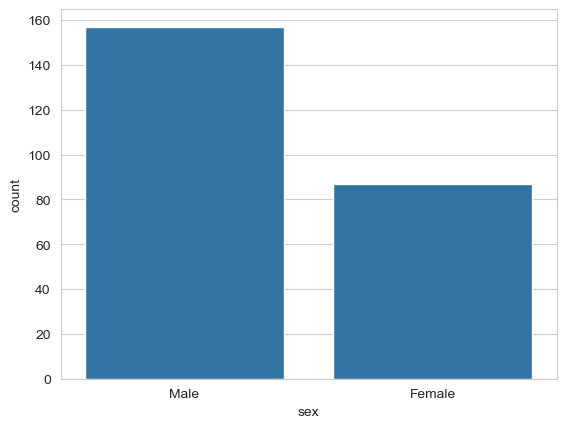

In [214]:
sns.set_style('whitegrid')
sns.countplot(x='sex',data=tips)

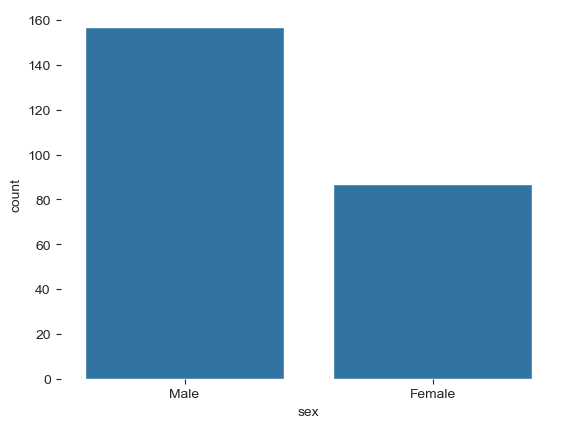

In [220]:
sns.set_style('ticks')
sns.countplot(x='sex',data=tips)
sns.despine(left=True,bottom=True)

<Axes: xlabel='sex', ylabel='count'>

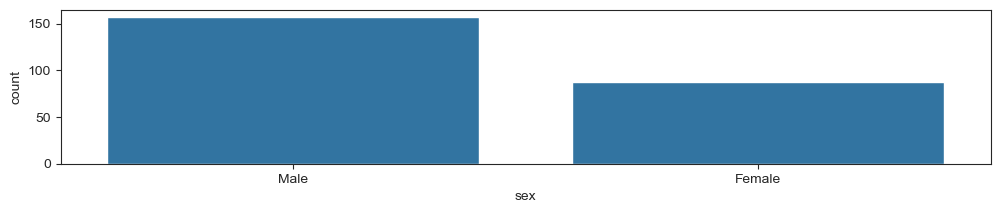

In [226]:
plt.figure(figsize=(12,2))
sns.countplot(x='sex',data=tips)

<Axes: xlabel='sex', ylabel='count'>

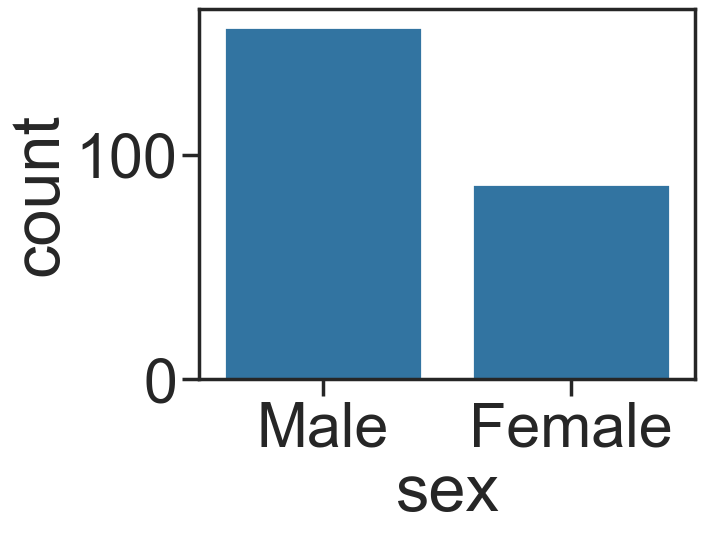

In [232]:
sns.set_context('poster',font_scale=2)
sns.countplot(x='sex',data=tips)

<Axes: xlabel='sex', ylabel='count'>

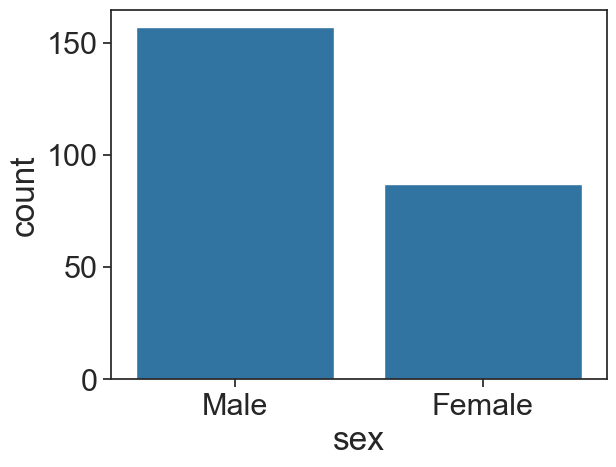

In [234]:
sns.set_context('notebook',font_scale=2)
sns.countplot(x='sex',data=tips)

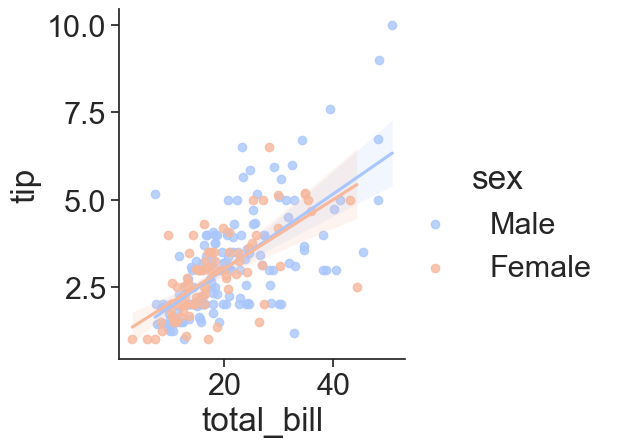

In [236]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm')

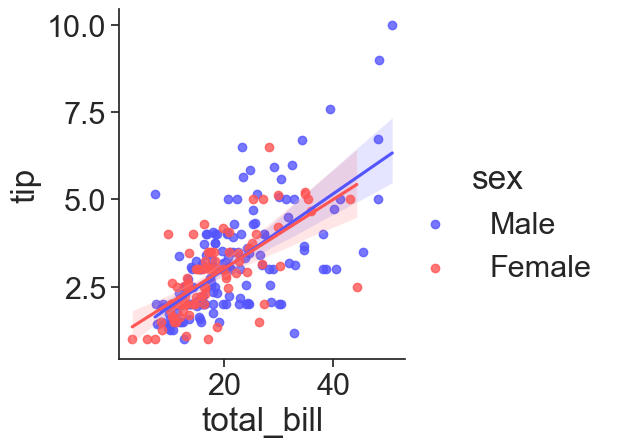

In [238]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='seismic')